Trends

According to the data and research the Urban has the has the most activity in regards to total drivers, riders and fares. The urban percentage and total number of rides is less than the number and percentage of drivers. We can assume that in urban cities, customer has more veriety of services that they can use besides that ride-share service, or drivers in the Urban market give more rides than the Surbarban and Rural areas.

Because, Urban area have generally high populations, the Urban area drivers give the most rides. Some Surburban areas are less populated than the Urban areas, and the Rural areas are generally more densely poplulated resulting in less rides given by the drivers on average. 

According to the bubble plot there appears to be a relationship between the Rual area and the average fare price. We can assume that since Rual areas are more spread out than Surbarabn and Urban areas, the drivers have to drive further distances on average resulting in higher fares in rual areas.  


In [160]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_df = city.drop_duplicates('city', keep = 'first')
# Combine the data into a single dataset
merged = pd.merge(ride, city, on="city", how="left")
# Display the data table for preview
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [161]:
# Obtain the x and y coordinates for each of the three city types
type_city = merged.groupby(['type','city'])
x_axis = type_city['ride_id'].count()
y_axis =type_city['fare'].mean()
drivercount = type_city['driver_count'].mean() 
drivercount.head()


type   city          
Rural  Bradshawfurt      7
       Garzaport         7
       Harringtonfort    4
       Jessicaport       1
       Lake Jamie        4
Name: driver_count, dtype: int64

In [162]:
# Build the scatter plots for each city types
types = merged['type'].unique()
colors = ['red', 'lightskyblue', 'blue']
colors_dictionary = {} 
c = 0

In [163]:
types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

NameError: name 'typelist' is not defined

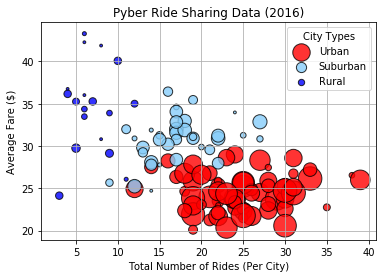

In [164]:
for type in types:
    plt.scatter(x.loc[type,:], y.loc[type,:], facecolors=colors[c], edgecolors='black', label=type,
                s=dcount[type]*8, alpha=0.8, linewidths=1)
    
    colors_dictionary[type] = colors[c] 
    
    c = (c + 1)%len(colors) 
   
    # adding the titles
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title='City Types')

for i in range(len(typelist)): 
    legend.legendHandles[i]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nScat size shows driver count per day")

# Save Figure
plt.savefig("Images/ScatterPlot.png", bbox_inches = "best")

In [165]:
# Show plot
plt.show()

## Total Fares by City Type

In [166]:
# Calculate Type Percents
percent_of_fare = merged.groupby(['type'])['fare'].sum()/merged['fare'].sum()
types = percent_of_fare.index.values
percent_of_fare

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

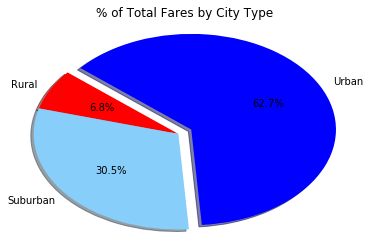

In [167]:
# Build Pie Chart
plt.pie(percent_of_fare, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1), shadow=True)
plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/FaresCityType.png")

In [168]:
# Show Figure
plt.show()

## Total Rides by City Type

In [169]:
# Calculate Ride Percents
ride_percent = merged.groupby(['type'])['ride_id'].count()/merged['ride_id'].count()
types = ride_percent.index.values 
ride_percent

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64

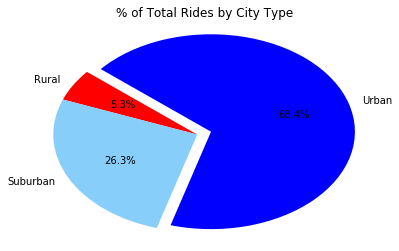

In [170]:
# Build Pie Chart
plt.pie(ride_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1))
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/RidesCityType.png")


In [171]:
# Show Figure
plt.show()

## Total Drivers by City Type

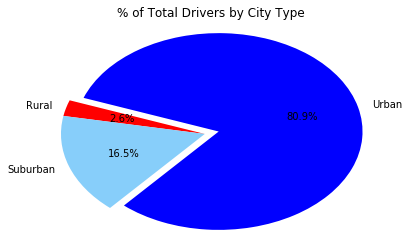

In [172]:
# Calculate Driver Percents
driver_percent = city.groupby(['type'])['driver_count'].sum()/city['driver_count'].sum()
types = driver_percent.index.values # new order of types for the pie

# Build Pie Charts
plt.pie(driver_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=160, explode=(0, 0, 0.1))
plt.title("% of Total Drivers by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/DriversCityType.png")

In [173]:
# Show Figure
plt.show()